# Dealing with infrequent apps

In [1]:
from spmf import Spmf
import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt

pd.options.display.max_colwidth = None

## Dealing with infrequency as defined by tne number of session in which an app occur

First the data is read into the program

In [4]:
data=pd.read_csv("data_sessions_20s_min_length_1.csv")

Now the number of sessions which each of the apps occure in is calculated.

In [5]:
app_in_n_sessions=data.groupby(['app_code','user_id']).session.nunique().reset_index().groupby("app_code").session.sum()

In [6]:
data=pd.merge(data, app_in_n_sessions.reset_index().rename(columns={'session':'number_of_sessions'}), how='left', on=['app_code'])

In [7]:
data['app_infrequent']=data.number_of_sessions<=(data.shape[0]/100*0.001)

In [8]:
data.shape[0]

181323205

In [9]:
data['new_session']=(data.new_session | data.app_infrequent)

In [10]:
data['updated_session']=data.groupby(['user_id']).agg({'new_session':'cumsum'}).astype('int')

In [11]:
data=data[data.app_infrequent!=True]

In [12]:
data=pd.merge(data,(data.groupby(['user_id','updated_session']).agg({'app_code':'size'})).reset_index().rename(columns={'app_code':'session_length_updated'}),how='left',on=['user_id','updated_session'])

In [13]:
data=data.drop(['session_length'],axis=1)

In [16]:
data=data[data.session_length_updated>1]

Create text file for algorithm input

In [17]:
input_string=data.groupby(['user_id','updated_session'])['app_code'].apply(list).apply(lambda l: ' -1 '.join([str(i) for i in l])+" -1 -2")

In [18]:
#update file name
input_string.to_csv("input_string_without_0_001_apps_internal_removed.csv",index=False)

In [2]:
#update file name
input_string=pd.read_csv("input_string_without_0_001_apps_internal_removed.csv")

In [19]:
print("number of updated sequences:",input_string.shape[0])

number of updated sequences: 55164865


In [3]:
dfAsString = input_string.to_string(header=False, index=False).lstrip()

In [4]:
dfAsString=re.sub(r'\n\s+','\n',dfAsString)

In [5]:
#update file name
f = open(os.path.join(os.getcwd(), '20sec_sessions_without_0_001_apps_internal_removed.txt'), 'w')
f.write(dfAsString)
f.close()

## Analysing frequency of apps in overall data set.

In [3]:
data=pd.read_csv("sorted_coded_session_20s_merged.csv")

First we take a look at the distribution of app occurrences.

In [7]:
app_count=data.groupby('app_code').size()

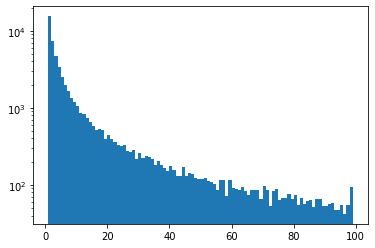

In [22]:
plt.hist(app_count,bins=range(1,100))#app_count.max(),100))
plt.yscale('log')

In [11]:
range(1,app_count.max(),1)

range(1, 35121339)

In [9]:
app_count.max()


35121339